# A Simple Example
1. datasets: iris
2. classification model: DecisionTrees

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# prepare iris dataset
iris_ex = load_iris()
iris_ex.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris_ex["target_names"])
print(iris_ex["feature_names"])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
X_ex = iris_ex.data[:,2:] # petal length and width
y_ex = iris_ex.target

tree_ex_2_clf = DecisionTreeClassifier(max_depth=2)
tree_ex_2_clf.fit(X_ex, y_ex)
tree_ex_3_clf = DecisionTreeClassifier(max_depth=3)
tree_ex_3_clf.fit(X_ex, y_ex)
tree_ex_5_clf = DecisionTreeClassifier(max_depth=5)
tree_ex_5_clf.fit(X_ex, y_ex)
tree_ex_12_clf = DecisionTreeClassifier(max_depth=12)
tree_ex_12_clf.fit(X_ex, y_ex)

DecisionTreeClassifier(max_depth=12)

In [38]:
print(X_ex.max(axis=0))
print(X_ex.min(axis=0))

[6.9 2.5]
[1.  0.1]


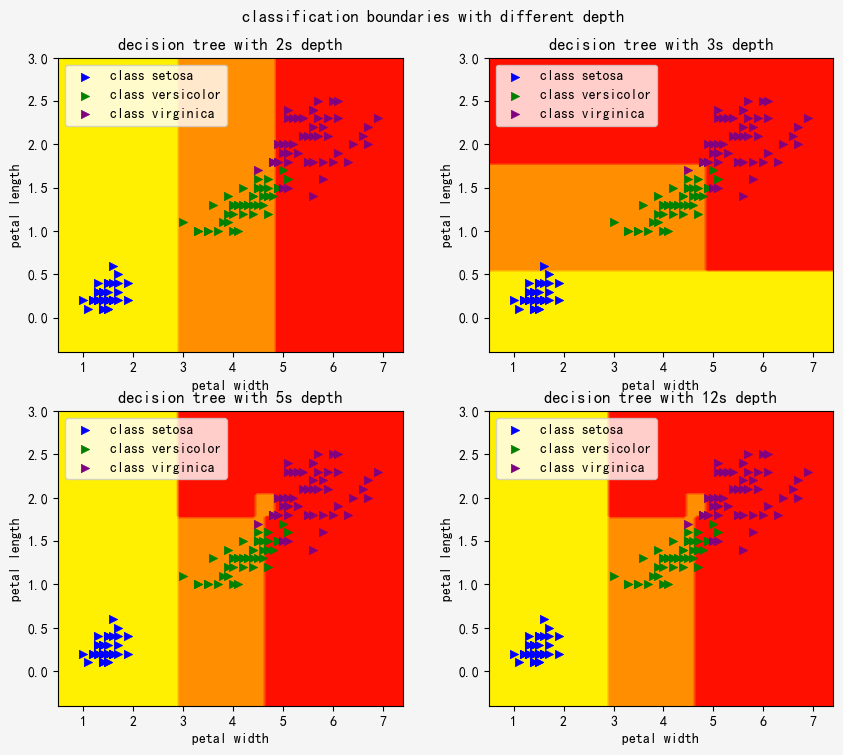

In [57]:
import matplotlib as mpl
import numpy as np
import copy
from matplotlib import pyplot as plt
from collections import Counter

%matplotlib inline

plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# prepare for display in different class
ids_collection = [[],[],[]]
for ids,(data,label) in enumerate(zip(X_ex,y_ex)):
    if label == 0:
        ids_collection[0].append(data)
    elif label == 1:
        ids_collection[1].append(data)
    else:
        ids_collection[2].append(data)    
ids_collection = np.array(ids_collection,dtype=np.float64)

# prepare for display of classification plane
X_mesh = np.linspace(X_ex.min(axis=0)[0]-0.5,X_ex.max(axis=0)[0]+0.5,100)
Y_mesh = np.linspace(X_ex.min(axis=0)[1]-0.5,X_ex.max(axis=0)[1]+0.5,100)
XX_mesh, YY_mesh = np.meshgrid(X_mesh, Y_mesh)
ZZ_mesh = np.zeros_like(XX_mesh)
ZZ_mesh_collection = [[],[],[],[]]

for ids,clf in enumerate([tree_ex_2_clf,tree_ex_3_clf,tree_ex_5_clf,tree_ex_12_clf]):
    # predict each point in meshgrid
    for idx in range(len(X_mesh)):
        for idy in range(len(Y_mesh)):
            ZZ_mesh[idx,idy] = clf.predict([[X_mesh[idx],Y_mesh[idy]]])
    ZZ_mesh_collection[ids] = ZZ_mesh
    ZZ_mesh = np.zeros_like(XX_mesh)

fig, ax = plt.subplots(2,2,figsize=(10,8),
                      facecolor="whitesmoke",
                      edgecolor="gray")
fig.suptitle("classification boundaries with different depth")
fig.subplots_adjust(top=0.92,hspace=0.20,wspace=0.25)
for ai,dep,ZZ in zip(ax.flat,[2,3,5,12], ZZ_mesh_collection):
    ai.contourf(XX_mesh,YY_mesh,ZZ,cmap=plt.cm.autumn_r)
    ai.scatter(ids_collection[0,:,0],ids_collection[0,:,1],marker='>',
               lw=.5,color='blue', label="class setosa")
    ai.scatter(ids_collection[1,:,0],ids_collection[1,:,1],marker='>',
               lw=.5,color='green', label="class versicolor")
    ai.scatter(ids_collection[2,:,0],ids_collection[2,:,1],marker='>',
               lw=.5,color='purple', label="class virginica")
    ai.legend(loc="best")
    ai.set_xlabel("petal width")
    ai.set_ylabel("petal length")
    ai.set_title("decision tree with " + str(dep) + "s depth")

## notice
1. note that depth will determine the final probabilities of each class due to the fact that shallower trees would be more likely to experience early-stopping
2. thus the leaf nodes of shallower trees would be less pure.

In [67]:
width_value = 4.5
length_value = 2.5

print(tree_ex_12_clf.predict_proba([[width_value,length_value]]))
print(tree_ex_5_clf.predict_proba([[width_value,length_value]]))
print(tree_ex_2_clf.predict_proba([[width_value,length_value]]))

[[0.         0.33333333 0.66666667]]
[[0.         0.33333333 0.66666667]]
[[0.         0.02173913 0.97826087]]


In [68]:
print(tree_ex_12_clf.predict([[width_value,length_value]]))
print(tree_ex_5_clf.predict([[width_value,length_value]]))
print(tree_ex_2_clf.predict([[width_value,length_value]]))

[2]
[2]
[2]


# Mathmatical Background
## Impurity Function

### Gini Impurity
$$
    Gini(D) = 1-\displaystyle\sum_{k=1}^{N}{{p_k}^2}
$$

for property a, its Gini index should be like

$$
    Gini_{index}(D,a) = \displaystyle\sum_{v=1}^{V}{\frac{|D^v|}{|D|}Gini(D^v)}
$$

in formula above, we have $V$ properties, its index is $(1,2,\cdots,k,\cdots,N)$, and $a$ is one specific property

## Prune parameters
1. min_samples_split
2. min_samples_leaf
3. min_weight_fraction_leaf
4. max_leaf_nodes

# Decision Tree Regressor
1. mainly used in numerical and continuous data
2. instead of calculating impurity in each node, this tree calculate MSE, on which dividing point the model would produce smaller total MSE

$$
    J(v,a) = \frac{|D_{left}|}{|D|}{MSE}_{left} + \frac{|D_{right}|}{|D|}{MSE}_{right}
$$

where $v$ stands for vth attribute and $a$ stands for ath value in vth attribute, $|D|$ stands for numbers of total data points, and other parameters are list as follows:

$$
\left \{
\begin{array}{ll}
MSE_{node} = \displaystyle\sum_{i \in node}{(\hat y_{node} - y_i)^2} \\
\hat y_{node} = \frac{1}{m_{node}} \sum_{i \in node}{y_i}
\end{array}
\right.
$$

<hr>
1. Decision Tree Regressor will perform like its classifier, classification plane will always parallel to axis, and regression result will simply be the <font color=maroon><b>average of all data in one leaf node.</b></font>

In [89]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl

np.random.RandomState(42)
X_reg = np.linspace(-1,1,100)
y_reg = np.power(X_reg,2)
y_reg_noise = y_reg + np.random.normal(loc=0, scale=.2, size=X_reg.shape[0])

tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_reg.reshape(-1,1), y_reg_noise.reshape(-1,1))
X_pred = tree_reg.predict(X_reg.reshape(-1,1))

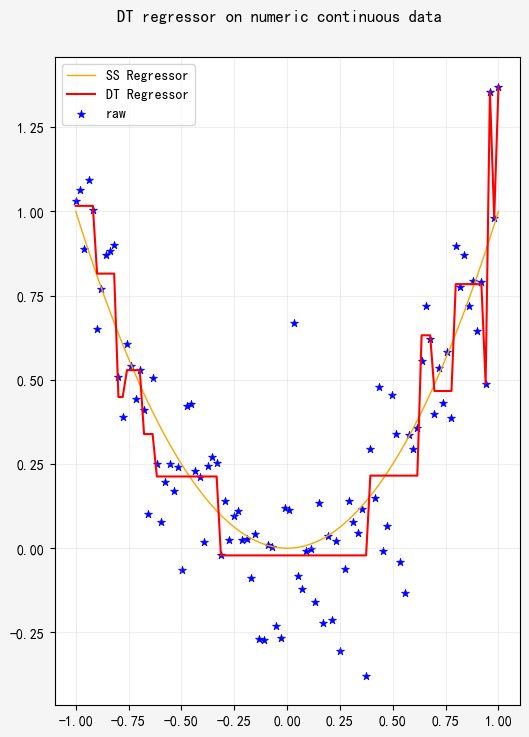

In [93]:
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(6,8),
                       facecolor="whitesmoke",
                      edgecolor="gray")
fig.suptitle("DT regressor on numeric continuous data")
fig.subplots_adjust(top=0.92)
ax.plot(X_reg,y_reg, ls='-', lw=1, color="orange", label="SS Regressor")
ax.plot(X_reg,X_pred, '-r', label="DT Regressor")
ax.scatter(X_reg,y_reg_noise, marker='*',lw=.5, color="blue", label="raw")
ax.legend(loc="best")
ax.grid(alpha=0.2)